[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ciri/iese-dsfb/blob/main/notebooks/010-Numpy.ipynb)

# NumPy: Numerical Python

## Why learn Numpy?

In today's data-driven world, everything can be quantified and represented as numbers—from user behavior on websites to patterns in medical data. Understanding these numerical representations is essential for machine learning, data analysis, and scientific computing. NumPy serves as the foundational package for numerical operations in Python, making it easier for you to delve into these domains.


## Numpy Arrays

This tutorial introduces you to NumPy's data containers, offering a quick look at how to manage data sets in Python. In the realm of mathematics, **vectors** and **matrices** are fundamental units represented as sequences and grids of numbers, respectively. They are integral to linear algebra, a crucial area in computational tasks underlying modern Machine Learning and Artificial Intelligence. In NumPy, these structures are simplified as one-dimensional (1D) and two-dimensional (2D) arrays, and the library even supports higher-dimensional arrays with ease.

To get started, import NumPy like this:

In [21]:
import numpy as np

A 1D arrays can be created from a list with the NumPy function array. If the items of the list have different
type, they are converted to a common type when creating the array. A simple example follows.

In [22]:
mylist = [2, 7, 14, 5, 9]
mylist

[2, 7, 14, 5, 9]

In [23]:
type(mylist)

list

In [24]:
arr1 = np.array([1,2,3,4])
arr1

array([1, 2, 3, 4])

This looks the same, but it's a very different beast! The constraint that everything has the same type is a useful one as it allows us to operate on the array more naturally. Try these for comparison:

In [25]:
arr1 + 1
mylist + [1]
arr1 * 2
mylist * 2

[2, 7, 14, 5, 9, 2, 7, 14, 5, 9]

In case of mixed types (never do this!) you will get unexpected results:

In [26]:
arr1 = np.array([1,'a',3,4])
arr1

array(['1', 'a', '3', '4'], dtype='<U21')

There are two types involves with arrays. The type of the array is `array`, its elements also have a type which can be checked using `myarray.dtype`:

In [27]:
type(arr1)

numpy.ndarray

In [28]:
arr1.dtype

dtype('<U21')

A 2D array can be directly created from a list of lists of equal length. The terms are entered row-by-row:

In [29]:
my_list_of_lists = [
    [0, 7, 2, 3], 
    [3, 9, -5, 1]
]
my_list_of_lists

[[0, 7, 2, 3], [3, 9, -5, 1]]

In [30]:
arr2 = np.array(my_list_of_lists)
arr2

array([[ 0,  7,  2,  3],
       [ 3,  9, -5,  1]])

Although we visualize a vector as a column (or as a row) and a matrix as a rectangular arrangement, with rows and columns, it is not so in the computer. The 1d array is just a sequence of elements of the same type, neither horizontal nor vertical. It has one **axis**, which is the 0-axis.

In a similar way, a 2d array is a sequence of 1d arrays of the same length and type. It has two axes. When we visualize it as rows and columns, `axis=0` means *across rows*, while `axis=1` means *across columns*.

The number of terms stored along an axis is the **dimension** of that axis. The dimensions are collected in the attribute `shape`:

In [31]:
arr1.shape

(4,)

In [32]:
arr2.shape

(2, 4)

In [33]:
arr3 = np.random.randn(2,3,4)
arr3.shape

(2, 3, 4)

This is a tuple, meaning that you can extract one of the elements, but you cannot reassign it.

In [34]:
print(arr2.shape[0])

2


In [35]:
arr2.shape[0] = 123

TypeError: 'tuple' object does not support item assignment

**You try it:**

1. Create a prediction function `price` that predicts the price of an appartment based on its surface:

    Price = 100,000 + 50,000 x (surf in m2)

2. Calculate the price of a house of 130 m2.
3. Calculate the price over a range of surfaces 50,60,..,130

In [ ]:
#### SOLUTION
def price(surf):
    return 100000 + 50000 * surf


print(price(130))

surfaces = np.array([50,60,70,80,90,100,110,120,130]) # Don't use me
surfaces = np.array(list(range(50,131,10)))   # This is better
surfaces = np.arange(50,131,10)               # This is best
prices   = price(surfaces)

prices

6600000


array([2600000, 3100000, 3600000, 4100000, 4600000, 5100000, 5600000,
       6100000, 6600000])

## RFM

As a running example to explore the fundamentals of NumPy we will perform RFM (Recency, Frequency, Monetary) analysis—a key technique in customer segmentation and marketing analytics.

RFM analysis is a behavior-based technique used to segment customers by examining their transaction history. It evaluates customers based on three dimensions:

- **Recency (R)**: How recently a customer has made a purchase.
- **Frequency (F)**: How often a customer makes a purchase.
- **Monetary Value (M)**: How much money a customer spends on purchases.

The idea of this battle-tested technique is that it allows us to (a) categorize customers into distinct groups for targeted marketing (b) find out recent / frequent buyers which are more likely to respond to new offers (c) focus efforts on segments that are more likely to generate higher returns.

Let's start with generating the dataset (you don't need to worry about this code for now).


In [32]:
import numpy as np

def generate_rfm_aggregate_data(num_customers=100, max_days_since_last_purchase=365, max_frequency=25, max_monetary=10000):
    """
    Generate synthetic aggregate RFM data for customers.

    Parameters:
    - num_customers: int, number of unique customers.
    - max_days_since_last_purchase: int, maximum number of days since the last purchase.
    - max_frequency: int, maximum number of transactions made by a customer.
    - max_monetary: int, maximum total amount spent by a customer.

    Returns:
    - data: np.ndarray, 2D array with columns: CustomerID, Recency, Frequency, Monetary.
    """
    np.random.seed(42)  # For reproducibility

    recency   = np.random.randint(1, max_days_since_last_purchase + 1, num_customers)
    frequency = np.random.randint(1, max_frequency + 1, num_customers)
    monetary  = np.round(np.random.uniform(10.0, max_monetary, num_customers), 2)

    data = np.column_stack((recency, frequency, monetary))

    return data

rfm_data = generate_rfm_aggregate_data(num_customers=1000)

## NumPy functions

NumPy incorporates vectorized forms of the **mathematical functions** of the package `math`. A **vectorized function** is one that, when applied to an array, returns an array with same shape, whose terms are the values of the function on the corresponding terms of the original array. For instance, the NumPy square root function `np.max` takes the maximum of every term of a numeric array:

In [33]:
np.max(rfm_data)

9994.14

You can also tell `numpy` to do this calculation along the rows or columns using the `axis` parameter. Let's try calculating the mean for Females v.s. Males using the `np.mean()` function.

In [34]:
np.mean(rfm_data ,axis=0)

array([ 182.557  ,   12.914  , 5008.59354])

NumPy also provides common mathematical and statistical functions, such as `median, max, sum, sqrt, std, quantile` etc.


Functions that are defined in terms of vectorized functions are automatically vectorized. Let's try this with an exercise:

**You try it:**

Given the recency, frequency and monetary value, calculate the RFM of the whole population. Remember that the formula for RFM is:

$$
    \text{RFM} = \
$$

In [40]:
# Weights in kg [Female, Male]
heights = np.array([[160, 175],
                       [155, 180],
                       [165, 170],
                       [162, 178],
                       [158, 172]])

weights = np.array([[55, 70],
                    [52, 77],
                    [58, 68],
                    [54, 75],
                    [53, 72]])

def bmi(height, weight):
    # complete me ...
    return 0

# call your function
...

# compute the average
...

Ellipsis

In [ ]:
#### SOLUTION

# Heights in kg [Female, Male]
heights = np.array([[160, 175],
                    [155, 180],
                    [165, 170],
                    [162, 178],
                    [158, 172]])
# Weights in kg [Female, Male]
weights = np.array([[55, 70],
                    [52, 77],
                    [58, 68],
                    [54, 75],
                    [53, 72]])

# long version
def bmi(height, weight):
    return weight / ((height/100.)**2)

# short version
bmi = lambda height, weight: weight / ((height/100.)**2)

all_bmis = bmi(heights, weights)

np.mean(all_bmis,axis=0)

array([21.2478296 , 23.63214401])

## Subsetting arrays

**Slicing** a 1D array is done the same as for a list:

In [42]:
arr1 = np.array([5,4,2,41])
arr1[0]

5

In [43]:
arr1[:3]

array([5, 4, 2])

The same applies to two-dimensional arrays, but we need two indexes within the square brackets. The first index selects the rows (`axis=0`), and the second index the columns (`axis=1`):

In [44]:
heights[[1,2], :3]

array([[155, 180],
       [165, 170]])

**Step intervals** can be used if we need to select only every n-th element of the array:

In [45]:
arr1, arr1[::2]

(array([ 5,  4,  2, 41]), array([5, 2]))

One special case of this which is used quite often is to use steps of -1, which is equivalent to reversing the array.

In [46]:
arr1, arr1[::-1]

(array([ 5,  4,  2, 41]), array([41,  2,  4,  5]))

In [47]:
arr1

array([ 5,  4,  2, 41])

In [48]:
arr1[::2]

array([5, 2])

Here's an overview of common slicing operations from McKinney (2017):

<center>
    <img src='./resources/nparray-indexing.png' width='60%'>
</center>

**Filtering** Subsets of an array can also be extracted by means of expressions which acts as filters. Any expression involving an array is evaluated in Python as a Boolean array (called a **Boolean mask**):

In [49]:
filter_tall = heights > 160
filter_tall

array([[False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False,  True]])

We can use this as an index, and it will remove anyone in the dataset who is too tall:

In [50]:
heights[filter_tall]

array([175, 180, 165, 170, 162, 178, 172])

These can be combined into complex expressions as suited for the application:

In [51]:
filter_tall   = heights > 160
filter_short  = heights < 180
heights[filter_tall & filter_short ]

array([175, 165, 170, 162, 178, 172])

Since both heights and weights are of the same size, we can filter either on the other:

In [52]:
weights[filter_tall]

array([70, 77, 58, 68, 54, 75, 72])

### Extra exercises for home

**You try it**

What is the average BMI of people taller than 170m?

In [36]:
...

Ellipsis

In [37]:
#| code-fold: true 
#| code-summary: "Solution"

all_bmis = bmi(heights, weights)

filter_tall = heights > 170
np.mean(all_bmis[filter_tall])

23.65782707606685

**You try it**

Try to change the BMI function so that instead of given you your BMI, it returns a classification (string). The BMI classifications are:

* Below 18.5	Underweight
* 18.5 – 24.9	Healthy Weight
* 25.0 – 29.9	Overweight
* 30.0 and Above	Obesity

In [ ]:
...

In [59]:
#| code-fold: true 
#| code-summary: "Solution"

def bmi_classification(height, weight):
    score = bmi(height, weight)

    if(score < 18.5):
        return "Underweight"
    elif(score <= 24.9):
        return "Healthy Weight"
    elif(score <=29.9):
        return "Overweight"
    else:
        return "Above Obesity"
    
bmi_classification(180,79)

'Healthy Weight'

# AREA51

In [1]:
import numpy as np

# Parameters
months = 12
simulations = 1000

# Fixed initial customers
initial_customers = 500

# Arrays to store simulation results
customer_counts = np.zeros((simulations, months))

# Run simulations
for i in range(simulations):
    customers = initial_customers
    for month in range(months):
        growth = np.random.normal(0.05, 0.02)  # Monthly growth rate
        churn = np.random.normal(0.03, 0.01)   # Monthly churn rate
        customers = customers * (1 + growth) * (1 - churn)
        customer_counts[i, month] = customers


In [2]:
# Arrays to store revenue results
revenues = np.zeros((simulations, months))

for i in range(simulations):
    for month in range(months):
        ARPU = np.random.normal(50, 5)  # Average Revenue per User
        revenues[i, month] = customer_counts[i, month] * ARPU


In [3]:
# Calculate mean and percentiles for each month
mean_revenue = revenues.mean(axis=0)
p10_revenue = np.percentile(revenues, 10, axis=0)
p90_revenue = np.percentile(revenues, 90, axis=0)

# Display results
for month in range(months):
    print(f"Month {month+1}: Mean Revenue = ${mean_revenue[month]:.2f}, "
          f"10th Percentile = ${p10_revenue[month]:.2f}, "
          f"90th Percentile = ${p90_revenue[month]:.2f}")


Month 1: Mean Revenue = $25495.17, 10th Percentile = $22093.36, 90th Percentile = $29019.26
Month 2: Mean Revenue = $25902.67, 10th Percentile = $22395.06, 90th Percentile = $29543.58
Month 3: Mean Revenue = $26518.78, 10th Percentile = $23105.59, 90th Percentile = $30121.44
Month 4: Mean Revenue = $26859.56, 10th Percentile = $22938.71, 90th Percentile = $30413.61
Month 5: Mean Revenue = $27293.87, 10th Percentile = $23410.17, 90th Percentile = $31466.93
Month 6: Mean Revenue = $27845.04, 10th Percentile = $24029.24, 90th Percentile = $31826.57
Month 7: Mean Revenue = $28493.13, 10th Percentile = $24310.59, 90th Percentile = $32608.03
Month 8: Mean Revenue = $29015.72, 10th Percentile = $24665.87, 90th Percentile = $33185.48
Month 9: Mean Revenue = $29597.93, 10th Percentile = $25390.50, 90th Percentile = $34139.82
Month 10: Mean Revenue = $29965.49, 10th Percentile = $25519.86, 90th Percentile = $34452.40
Month 11: Mean Revenue = $30548.77, 10th Percentile = $25964.13, 90th Percentil

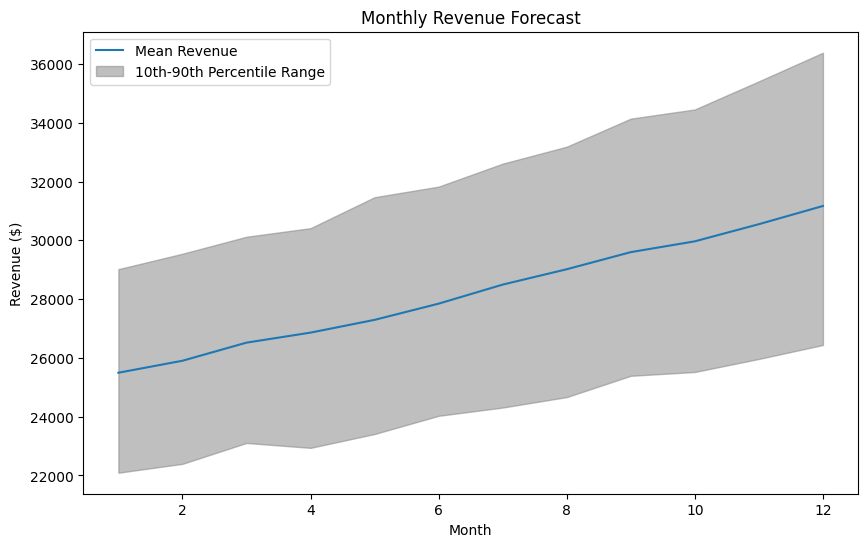

In [4]:
import matplotlib.pyplot as plt

# Plotting the revenue forecast
plt.figure(figsize=(10, 6))
plt.plot(range(1, months + 1), mean_revenue, label='Mean Revenue')
plt.fill_between(range(1, months + 1), p10_revenue, p90_revenue, color='gray', alpha=0.5, label='10th-90th Percentile Range')
plt.title('Monthly Revenue Forecast')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.legend()
plt.show()
